# Model Development

Develop several models to predict the price of the car using the variables or features.

This is just an estimate but should give us an objective idea of how much the car should cost.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import Data**

You can find the "Automobile Dataset" from the following link: <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

Here we are using the data we prepared on our previous chapter.
https://github.com/ElsonFilho/Python_DataAnalysis/blob/main/notebooks/02_Data_Wrangling.ipynb


In [2]:
# Path to the CSV file
path = "/content/sample_data/clean_df.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


## Linear Regression

In [4]:
# Load the modules for linear regression

from sklearn.linear_model import LinearRegression

In [5]:
# Create the linear regression object

lm = LinearRegression()
lm

LinearRegression()

In [6]:
# Let's look at how highway-mpg can help us predict car price.
# Using simple linear regression, we will create a linear function with "highway-mpg"
# as the predictor variable and the "price" as the response variable.

X = df[['highway-mpg']]
Y = df['price']

In [7]:
# Fit the linear model

lm.fit(X,Y)

LinearRegression()

In [8]:
# The value of th intercept

lm.intercept_

np.float64(38423.3058581574)

In [9]:
# The value of the slope (b)

lm.coef_

array([-821.73337832])

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression.

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

Most of the real-world regression models involve multiple predictors.

In [10]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [11]:
lm.fit(Z, df['price'])

LinearRegression()

In [12]:
lm.intercept_

np.float64(-15811.863767729232)

In [13]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

## Model Evaluation

(0.0, 48168.762822991026)

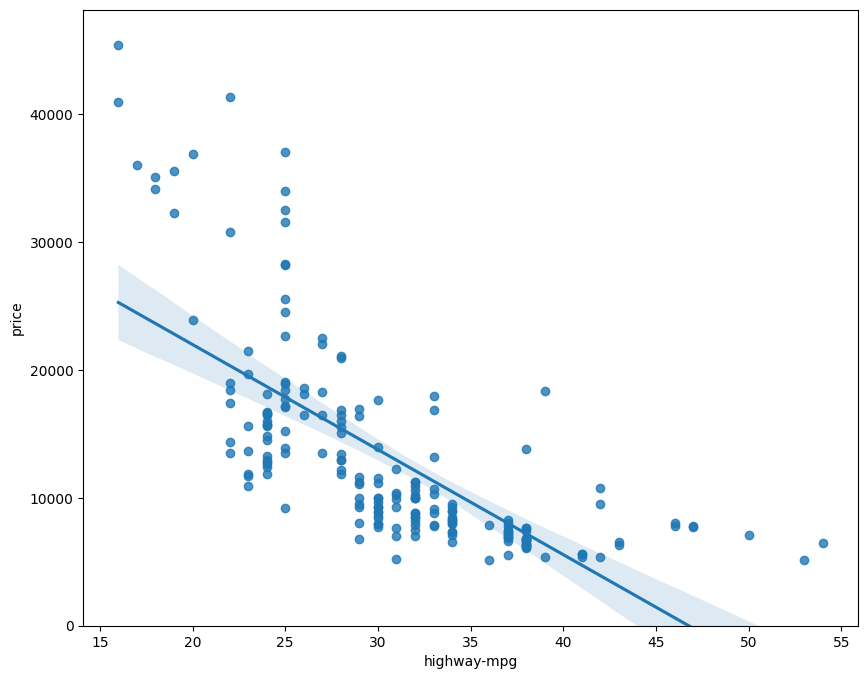

In [17]:
# Regression Plot

width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

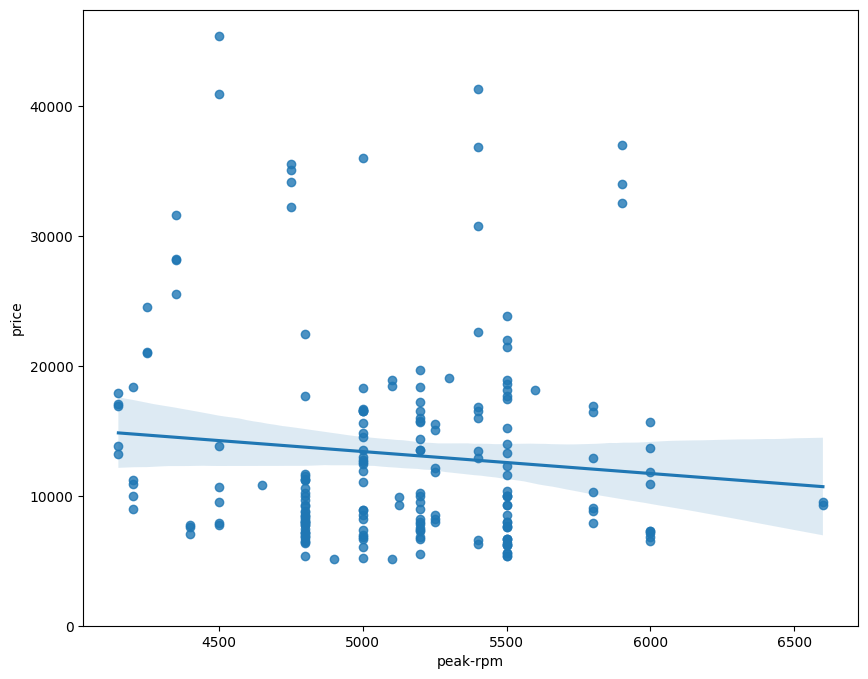

In [18]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>

**Residual Plot**

<p>A good way to visualize the variance of the data is to use a residual plot.</p>
<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>Look at the spread of the residuals, if the points are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.
Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

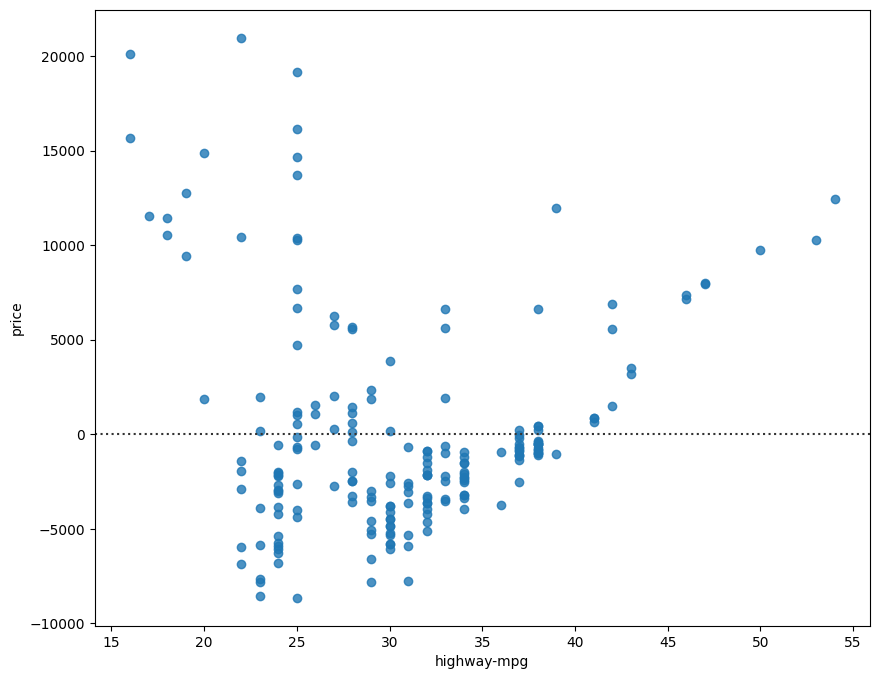

In [19]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>

**Multiple Linear Regression**

You can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

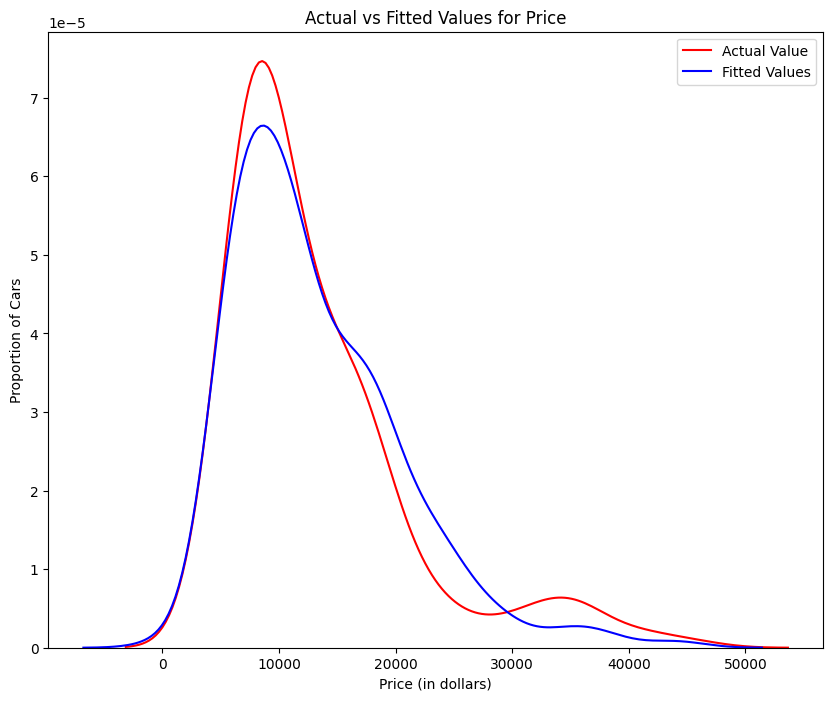

In [16]:
# Prediction
Y_hat = lm.predict(Z)

# Plot
width = 10
height = 8
plt.figure(figsize=(width, height))

sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit.

However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

In [24]:
# Define a function to plot the data.

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [21]:
# The Variables.

x = df['highway-mpg']
y = df['price']

In [22]:
# Fitting a polynomial model
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


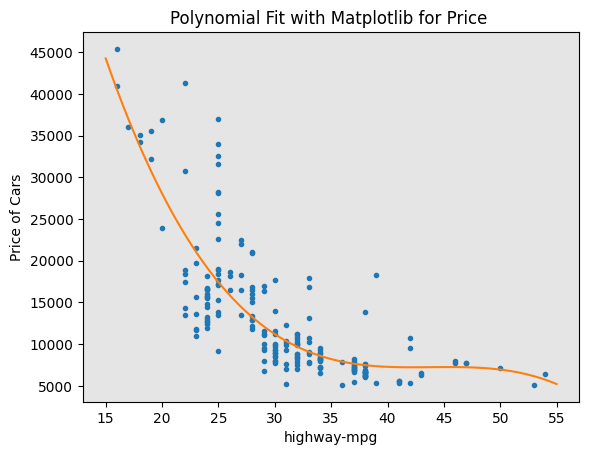

In [25]:
PlotPolly(p, x, y, 'highway-mpg')

This polynomial model performs better than the linear model.

Polynomial transform on multiple features.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [28]:
Z_pr=pr.fit_transform(Z)

In [30]:
# In the original data, there are 201 samples and 4 features

Z.shape

(201, 4)

In [31]:
# After the transformation, there are 201 samples and 15 features.

Z_pr.shape

(201, 15)

## Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline.

We also use StandardScaler as a step in our pipeline.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
# We create the pipeline by creating a list of tuples including
# the name of the model or estimator
# and its corresponding constructor

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [34]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
# First, we convert the data type Z to type float to avoid conversion warnings
# that may appear as a result of StandardScaler taking float inputs.
# Then, we can normalize the data, perform a transform and fit the model.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [36]:
# Then we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

## Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

**Simple Linear Regression**

In [37]:
#highway_mpg_fit


lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [41]:
Y[0:4]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0


In [38]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [39]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Multiple Linear Regression**

In [43]:
# Fit the model
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression.

In [44]:
# MSE

# Produce the predidtions
Y_predict_multifit = lm.predict(Z)

# Compare resulsts
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))


The mean square error of price and predicted value using multifit is:  11979300.34981888


**Polynomial Fit**

In [45]:
from sklearn.metrics import r2_score

In [46]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [47]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

We will use the method <b>predict</b> to produce a prediction.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [48]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [49]:
# Fit the model

lm.fit(X, Y)
lm

LinearRegression()

In [50]:
# Produce a prediction

yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

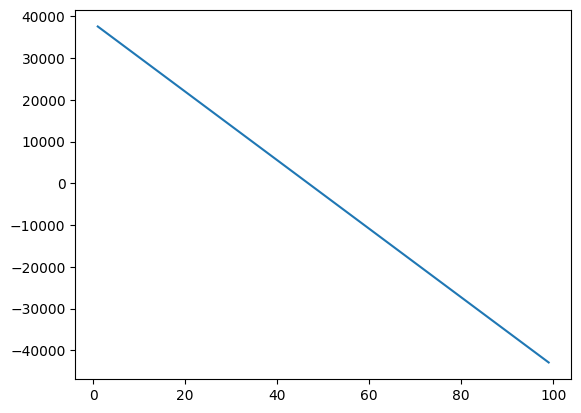

In [51]:
plt.plot(new_input, yhat)
plt.show()

## Determining a Good Model Fit

When comparing models:

**- the model with the higher R-squared value is a better fit.**

**- the model with the smallest MSE value is a better fit.**